# Libraries import


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")



Mounted at /content/drive/
 160122733032.pptx				   'GigTrove_PPT (2).gslides'
'305CNLAB week-4.gdoc'				    GigTrove_PPT.gslides
 a1_RestaurantReviews_HistoricDump.tsv		   'Green Sight.gslides'
 accenture.gdoc					    INTERNSHIP
 BigDataassig.gdoc				   'Invited Talks Report.gdoc'
 bookregistery					    mergesort.gdoc
 c1_BoW_Sentiment_Model.pkl			    MindMend.pptx
 c2_Classifier_Sentiment_Model			   'MindMend.pptx - Bar chart 1.gsheet'
 caseetoools.gdoc				    myspace
'casetools (1) (1).gdoc'			    myspace2
'casetools (1) (2).gdoc'			   'Panel -5.gdoc'
'case tools (1).gdoc'				   'PROBABILITY AND STATISTICS'
'casetools (1).gdoc'				   'Professional profile.gslides'
'casetools (2).gdoc'				    project.gdoc
 case_toolsweek4_merged.gdoc			   'Prototyping presentation (1).gslides'
'case_toolsweek5 (1) (1).gdoc'			   'Prototyping presentation.gslides'
'case_toolsweek5 (1).gdoc'			    reacthooks
 cash.gdoc					    Resume.gdoc
'Colab Notebooks'				   's42979-024-03105-8 (3).gdoc'
'COMPUTER 

# Data preprocessing


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_analysis/training.1600000.processed.noemoticon.csv',encoding='latin-1')
df.drop(columns=['NO_QUERY','_TheSpecialOne_','Mon Apr 06 22:19:45 PDT 2009','1467810369'])



,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


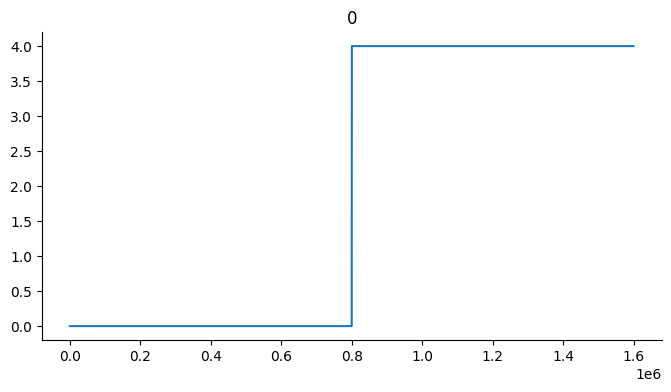

In [ ]:
from matplotlib import pyplot as plt
_df_2=df[['0']].copy()
_df_2['0'].plot(kind='line', figsize=(8, 4), title='0')
plt.gca().spines[['top', 'right']].set_visible(False)

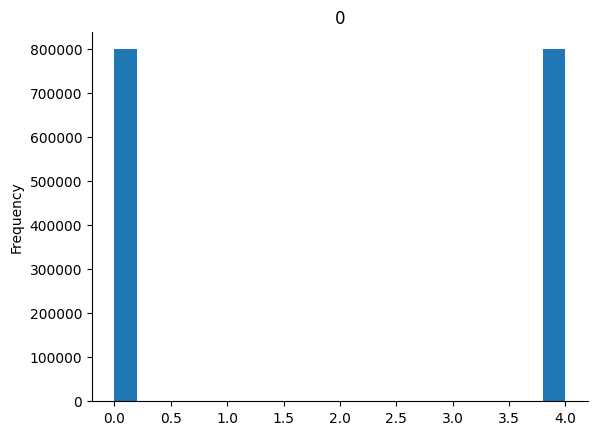

In [ ]:
from matplotlib import pyplot as plt
_df_0['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

stemmer=SnowballStemmer('english')

def stem_text(text):
  words=word_tokenize(text)
  stemmed_words=[stemmer.stem(word) for word in words]
  return ' '.join(stemmed_words)

df["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].astype(str)
df['stemmed_text']=[' '.join([stemmer.stem(word.lower()) for word in word_tokenize(text)]) for text in df["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_analysis/training.1600000.processed.noemoticon.csv',encoding='latin-1')
print(df.columns)

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [ ]:
columns_to_remove=["1467810369","NO_QUERY","_TheSpecialOne_",'Mon Apr 06 22:19:45 PDT 2009']
df.drop(columns=columns_to_remove,inplace=True)


In [ ]:
#removing stop words and urls,mentions
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess_tweet(tweet):
  #removing urls
  tweet=re.sub(r'http\S+|www\S+|https\S+','',tweet,flags=re.MULTILINE)
  #removing mentions
  tweet=re.sub(r'@\w+','',tweet)
  #removing special characters
  tweet=re.sub(r'[^\w\s]','',tweet).lower()
  #tokenize the tweet
  tokens=word_tokenize(tweet)
  #remove stop words
  stop_words=set(stopwords.words('english'))
  filtered_tokens=[word for word in tokens if word not in stop_words]
  #join the tokens back into a string
  preprocessed_tweet=' '.join(filtered_tokens)
  return preprocessed_tweet
  #apply the preprocessing to the tweet column
df['processed_text'] = df["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].apply(preprocess_tweet)

In [ ]:
df.head()

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",processed_text
0,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
4,0,@Kwesidei not the whole crew,whole crew


# Data Transformation


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['processed_text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,df['0'],test_size=0.2,random_state=42)

# Models testing


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC # Import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:

# a. Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_probs = lr_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# b. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_pred_probs = nb_model.predict_proba(X_test)[:, 1]

# c. Linear SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def calculate_metrics(y_true, y_pred, y_pred_probs=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=4)  # pos_label should be 4
    recall = recall_score(y_true, y_pred, pos_label=4)  # pos_label should be 4
    f1 = f1_score(y_true, y_pred, pos_label=4)  # pos_label should be 4
    auc = roc_auc_score(y_true, y_pred_probs) if y_pred_probs is not None else None
    return accuracy, precision, recall, f1, auc

lr_metrics = calculate_metrics(y_test, lr_pred, lr_pred_probs)
nb_metrics = calculate_metrics(y_test, nb_pred, nb_pred_probs)
svm_metrics = calculate_metrics(y_test, svm_pred)  # AUC will be None for SVM

# 5. Print Results
print("Logistic Regression Metrics:", lr_metrics)
print("Naive Bayes Metrics:", nb_metrics)
print("Linear SVM Metrics:", svm_metrics)

Logistic Regression Metrics: (0.781834375, 0.7693248837388862, 0.80702279042528, 0.7877230697190744, 0.8547701593333012)
Naive Bayes Metrics: (0.771078125, 0.7823675234143911, 0.7530871120082738, 0.767448135743877, 0.84521401190292)
Linear SVM Metrics: (0.773703125, 0.7636144910014783, 0.7949048633695937, 0.7789455689904118, None)


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC # Import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Define a custom scoring function
f1_scorer = make_scorer(f1_score, pos_label=4)

# Step 2: Hyperparameter Tuning with GridSearchCV (Updated)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Ensure compatibility with penalties
}
grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring=f1_scorer,  # Use the custom scoring function
    n_jobs=-1,
    error_score='raise',  # Raise an error for invalid configurations
)
grid_search.fit(X_train_tfidf, y_train)
best_lr_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# Step 3: Evaluate the Fine-Tuned Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=4)  # Set positive class
    recall = recall_score(y_test, y_pred, pos_label=4)
    f1 = f1_score(y_test, y_pred, pos_label=4)
    auc = roc_auc_score(y_test, y_pred_probs)
    return accuracy, precision, recall, f1, auc

lr_metrics = evaluate_model(best_lr_model, X_test_tfidf, y_test)
print("Fine-Tuned Logistic Regression Metrics:", lr_metrics)


Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Fine-Tuned Logistic Regression Metrics: (0.778146875, 0.7660735623710697, 0.8028484916451721, 0.7840300319119485, 0.8588108947854007)


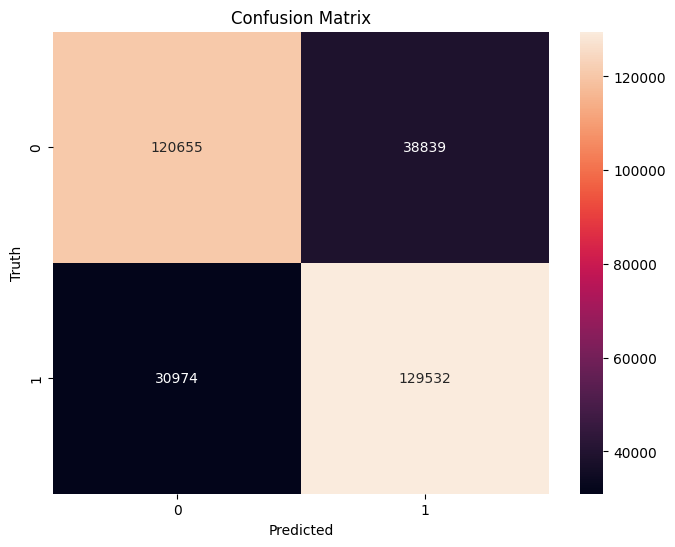

In [ ]:
cm=confusion_matrix(y_test,lr_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use a smaller subset of the training data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Step 1: Train the Random Forest Classifier with Default Parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 3: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=4)
recall = recall_score(y_test, y_pred, pos_label=4)
f1 = f1_score(y_test, y_pred, pos_label=4)

print("Default Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Step 4: Hyperparameter Tuning (Optimized)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,  # Use 3-fold cross-validation for faster execution
    scoring='accuracy',
    n_jobs=-1  # Utilize all available cores
)

grid_search.fit(X_train_small, y_train_small)  # Use smaller subset for tuning

best_rf_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the Best Model
best_rf_classifier.fit(X_train, y_train)
y_pred_best = best_rf_classifier.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, pos_label=4)
best_recall = recall_score(y_test, y_pred_best, pos_label=4)
best_f1 = f1_score(y_test, y_pred_best, pos_label=4)

print("\nFine-Tuned Model Metrics:")
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1-score:", best_f1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 2. Make predictions
y_pred = rf_classifier.predict(X_test)

# 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=4)
recall = recall_score(y_test, y_pred, pos_label=4)
f1 = f1_score(y_test, y_pred, pos_label=4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# 4. Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

